r178459r
MUJATI KUNDAI B.
HCT404
CTHSC

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D, Dropout, LeakyReLU
from tensorflow.keras.utils import to_categorical

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Load the Fashion MNIST dataset
(train_X, train_y), (test_X, test_y) = tf.keras.datasets.fashion_mnist.load_data()  # Returns a list of tuples [(train_X, train_y), (test_X, test_y)]

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
labels = {0: "T-shirt/top", 
          1: "Trouser", 
          2: "Pullover", 
          3: "Dress", 
          4: "Coat", 
          5: "Sandal", 
          6: "Shirt", 
          7: "Sneaker", 
          8: "Bag", 
          9: "Ankle boot"}

In [4]:
# Look at the shape of the dataset
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
# Visualize a sample (first 25 examples) of the data
def visualize_data():
  fig = plt.figure(figsize=(10,10))

  for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_X[i], cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(labels[train_y[i]] + "(" + str(train_y[i]) + ")")

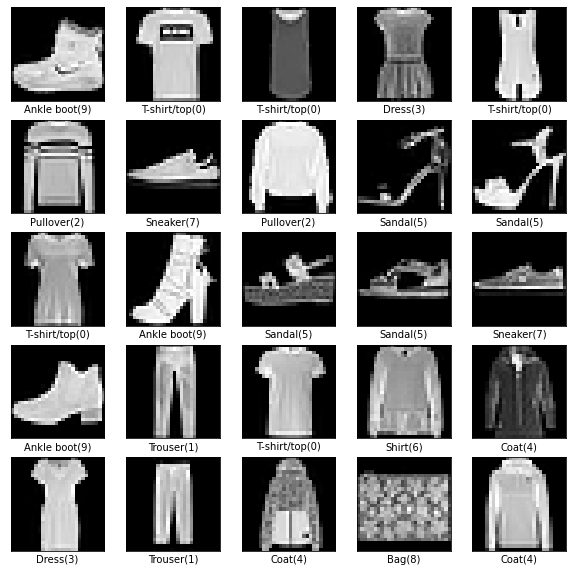

In [6]:
visualize_data()

In [7]:
# Reshape X_train and X_test to be of shape (m,n,n,1)
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

In [8]:
# Normalize the inputs i.e. X_train and X_test
def normalize(train_X, test_X):
  return train_X.astype("float32") / 255.0 , test_X.astype("float32") / 255.0

In [9]:
train_X, test_X = normalize(train_X, test_X)

In [10]:
# Check at the shape of our data
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

In [11]:
# Convert labels to be one hot encoded
train_y_one_hot = to_categorical(train_y)
test_y_one_hot = to_categorical(test_y)

In [12]:
# Display change of categorical label to one hot encoded label
print("Categorical Label", train_y[1])
print("One-Hot Encoded Label", train_y_one_hot[1])

Categorical Label 0
One-Hot Encoded Label [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# Split training data into train and validation sets with an 80 - 20 split
train_X, valid_X, train_label, valid_label = train_test_split(train_X, train_y_one_hot, test_size=0.2, random_state=13)

In [15]:
# Final check at the shape of our data
train_X.shape, train_label.shape, valid_X.shape, valid_label.shape

((48000, 28, 28, 1), (48000, 10), (12000, 28, 28, 1), (12000, 10))

In [16]:
#define and train model
# create a ConvNet architecture
fashion_model = tf.keras.Sequential()

fashion_model.add(Conv2D(filters=32, kernel_size=(3,3), activation="linear", padding="same", input_shape=(28, 28, 1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2,2), padding="same"))
fashion_model.add(Conv2D(filters=64, kernel_size=(3,3), activation="linear", padding="same"))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2,2), padding="same"))
fashion_model.add(Conv2D(filters=128, kernel_size=(3,3), activation="linear", padding="same"))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2,2), padding="same"))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation="linear"))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dense(10, activation="softmax"))

In [17]:
# Compile model
optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.CategoricalCrossentropy()

fashion_model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

In [18]:
# Look at the summary of the model
fashion_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         7

In [19]:
BATCH_SIZE = 64
EPOCHS = 20

history = fashion_model.fit(x=train_X, y=train_label, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=2, validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 - 81s - loss: 0.4570 - accuracy: 0.8338 - val_loss: 0.3155 - val_accuracy: 0.8842
Epoch 2/20
750/750 - 79s - loss: 0.2894 - accuracy: 0.8953 - val_loss: 0.2815 - val_accuracy: 0.8979
Epoch 3/20
750/750 - 79s - loss: 0.2389 - accuracy: 0.9125 - val_loss: 0.2643 - val_accuracy: 0.9053
Epoch 4/20
750/750 - 79s - loss: 0.2093 - accuracy: 0.9236 - val_loss: 0.2395 - val_accuracy: 0.9141
Epoch 5/20
750/750 - 80s - loss: 0.1829 - accuracy: 0.9317 - val_loss: 0.2567 - val_accuracy: 0.9128
Epoch 6/20
750/750 - 80s - loss: 0.1630 - accuracy: 0.9399 - val_loss: 0.2425 - val_accuracy: 0.9170
Epoch 7/20
750/750 - 80s - loss: 0.1406 - accuracy: 0.9486 - val_loss: 0.2338 - val_accuracy: 0.9169
Epoch 8/20
750/750 - 79s - loss: 0.1231 - accuracy: 0.9537 - val_loss: 0.2415 - val_accuracy: 0.9202
Epoch 9/20
750/750 - 80s - loss: 0.1033 - accuracy: 0.9608 - val_loss: 0.2650 - val_accuracy: 0.9207
Epoch 10/20
750/750 - 81s - loss: 0.0885 - accuracy: 0.9670 - val_loss: 0.2765 - val_accura

In [20]:
# Evaluate the data with the test set
test_loss, test_accuracy = fashion_model.evaluate(test_X, test_y_one_hot)
print("Fashion Model Test Accuracy: ", str(test_accuracy))

313/313 [==============================] - 5s 17ms/step - loss: 0.4748 - accuracy: 0.9103
Fashion Model Test Accuracy:  0.9103000164031982


In [21]:
epochs = history.epoch
history = history.history

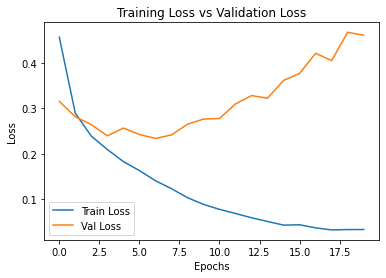

In [22]:
# Visualize the train and test losses
plt.title("Training Loss vs Validation Loss")
plt.plot(epochs, history["loss"], label="Train Loss")
plt.plot(epochs, history["val_loss"], label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

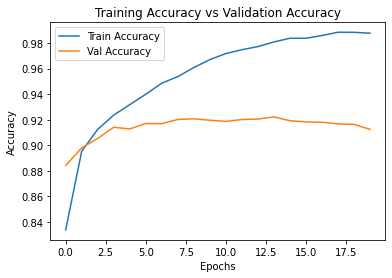

In [23]:
# Visualize Accuracy for train and validation sets
plt.title("Training Accuracy vs Validation Accuracy")
plt.plot(epochs, history["accuracy"], label="Train Accuracy")
plt.plot(epochs, history["val_accuracy"], label="Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [24]:
# Add dropout to the current model architecture to prevent overfitting,,,fine tuning model
fashion_model = tf.keras.Sequential()

fashion_model.add(Conv2D(filters=32, kernel_size=(3,3), activation="linear", padding="same", input_shape=(28, 28, 1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2,2), padding="same"))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(filters=64, kernel_size=(3,3), activation="linear", padding="same"))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2,2), padding="same"))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(filters=128, kernel_size=(3,3), activation="linear", padding="same"))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2,2), padding="same"))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation="linear"))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(10, activation="softmax"))

In [25]:
fashion_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)         

In [26]:
# Compile model
optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.CategoricalCrossentropy()

fashion_model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

In [ ]:
history_dropout = fashion_model.fit(x=train_X, y=train_label, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=2, validation_data=(valid_X, valid_label))

In [27]:
# Save model
fashion_model.save("fashion_model_dropout.h5py")

INFO:tensorflow:Assets written to: fashion_model_dropout.h5py/assets


In [28]:
# Evaluate the data with the test set
test_loss, test_accuracy = fashion_model.evaluate(test_X, test_y_one_hot)
print("Fashion Model Test Accuracy: ", str(test_accuracy))

313/313 [==============================] - 6s 17ms/step - loss: 2.2943 - accuracy: 0.1279
Fashion Model Test Accuracy:  0.12790000438690186


In [ ]:
epochs = history_dropout.epoch
history = history_dropout.history

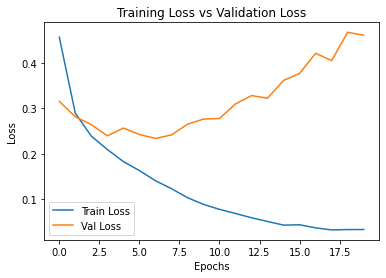

In [29]:
# Visualize the train and test losses
plt.title("Training Loss vs Validation Loss")
plt.plot(epochs, history["loss"], label="Train Loss")
plt.plot(epochs, history["val_loss"], label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

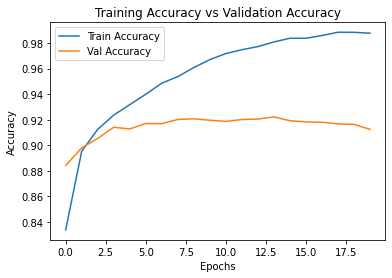

In [30]:
# Visualize Accuracy for train and validation sets
plt.title("Training Accuracy vs Validation Accuracy")
plt.plot(epochs, history["accuracy"], label="Train Accuracy")
plt.plot(epochs, history["val_accuracy"], label="Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [31]:
predicted_classes = fashion_model.predict(test_X)

In [32]:
predicted_classes = np.argmax(predicted_classes, axis=1)

In [33]:
predicted_classes.shape, test_y.shape

((10000,), (10000,))

In [34]:
correct = np.where(predicted_classes == test_y[0])
print("Found %d correct labels" %len(correct[0]))

Found 2549 correct labels


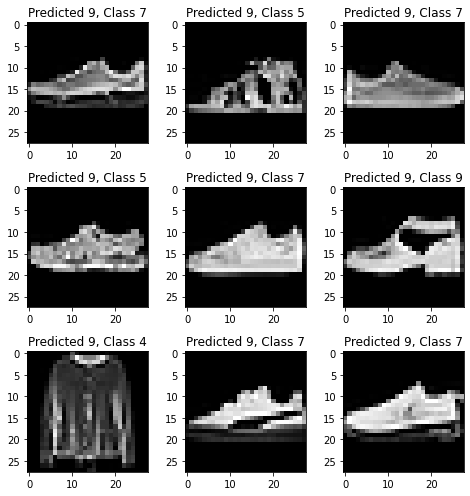

In [35]:
fig = plt.figure(figsize=(7,7))

for i, correct_idx in enumerate(correct[0][:9]):
  plt.subplot(3,3,i+1)
  img = test_X[correct_idx].reshape(28,28)
  plt.imshow(img, cmap="gray")
  plt.title("Predicted {}, Class {}".format(predicted_classes[correct_idx], test_y[correct_idx]))
  plt.tight_layout()

In [39]:

 
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix
confusion_matrix(test_X, predicted_classes)


# Finding precision and recall
from sklearn.metrics import precision_score, recall_score
precision_score(predicted_classes, test_X)
recall_score(test_X, predicted_classes)

ValueError: ignored